In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn import linear_model

In [2]:
df = pd.read_csv("rainfall in india 1901-2015.csv", na_values = 'NA')

In [3]:
df.dropna(how = 'any', inplace = True)

In [4]:
df.isnull().sum()

SUBDIVISION    0
YEAR           0
JAN            0
FEB            0
MAR            0
APR            0
MAY            0
JUN            0
JUL            0
AUG            0
SEP            0
OCT            0
NOV            0
DEC            0
ANNUAL         0
Jan-Feb        0
Mar-May        0
Jun-Sep        0
Oct-Dec        0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.shape

(4090, 19)

In [7]:
df['SUBDIVISION'].nunique()

36

In [8]:
feature_columns = ['YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'Jan-Feb', 'Mar-May', 'Jun-Sep', 'Oct-Dec']
target_column = 'ANNUAL'

In [9]:
# Separate features and target
X = df[feature_columns]
y = df[target_column]

In [10]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X, y)

ExtraTreesRegressor()

In [11]:
print(model.feature_importances_)

[0.00061159 0.00247672 0.00205484 0.00193906 0.00980218 0.05777061
 0.23186829 0.11299703 0.04556259 0.01692897 0.01079142 0.00301417
 0.00158723 0.00581601 0.07924306 0.39743836 0.02009789]


In [12]:
feat_imp = pd.Series(model.feature_importances_, index = X.columns)

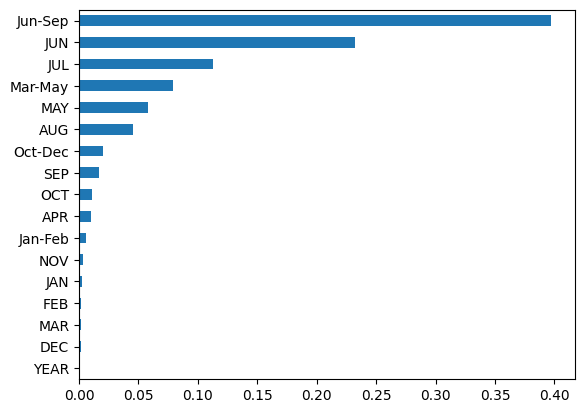

In [13]:
feat_imp.sort_values().plot(kind = 'barh')
plt.show()

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [15]:
feature_columns = ['SUBDIVISION', 'YEAR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP']
target_column = 'ANNUAL'

In [17]:
# Separate features and target
X = df[feature_columns]
y = df[target_column]

In [18]:
# Preprocessing for numerical and categorical data
numeric_features = ['YEAR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP']
categorical_features = ['SUBDIVISION']

In [19]:
# Create the preprocessing pipelines for both numeric and categorical data
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

## Linear Regression

In [20]:
from sklearn.linear_model import LinearRegression
# Define the model pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [21]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# Train the model
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['YEAR', 'MAY', 'JUN', 'JUL',
                                                   'AUG', 'SEP']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['SUBDIVISION'])])),
                ('regressor', LinearRegression())])

In [23]:
# Make predictions
y_pred = model.predict(X_test)

In [33]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [34]:
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 12070.905402526669
Mean Absolute Error: 77.56755459674449
R^2 Score: 0.9860546938049672


In [35]:
y_train_pred = model.predict(X_train)
mse = mean_squared_error(y_train, y_train_pred)
mae = mean_absolute_error(y_train, y_train_pred)
r2 = r2_score(y_train, y_train_pred)
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 10675.427399982173
Mean Absolute Error: 71.44948111298358
R^2 Score: 0.9867267606790862


In [29]:
new_data = pd.DataFrame({
    'SUBDIVISION': ['ANDAMAN & NICOBAR ISLANDS'],
    'YEAR': [1901],
    'MAY': [528.8],
    'JUN': [517.5],
    'JUL': [365.1],
    'AUG': [481.1],
    'SEP': [332.6]
})

# Make predictions using the trained model
predicted_annual_rainfall = model.predict(new_data)

# Print the predicted annual rainfall
print(f'Predicted Annual Rainfall: {predicted_annual_rainfall[0]}')

Predicted Annual Rainfall: 3116.907265881029


In [38]:
new_data = pd.DataFrame({
    'SUBDIVISION': ['LAKSHADWEEP'],
    'YEAR': [2015],
    'MAY': [133.1],
    'JUN': [296.6],
    'JUL': [257.5],
    'AUG': [146.4],
    'SEP': [160.4]
})

# Make predictions using the trained model
predicted_annual_rainfall = model.predict(new_data)

# Print the predicted annual rainfall
print(f'Predicted Annual Rainfall: {predicted_annual_rainfall[0]}')

Predicted Annual Rainfall: 1430.3965232131447


## Ridge Regression

In [41]:
from sklearn.linear_model import Ridge 
# Define the model pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=0.01))
])

In [42]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
# Train the model
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['YEAR', 'MAY', 'JUN', 'JUL',
                                                   'AUG', 'SEP']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['SUBDIVISION'])])),
                ('regressor', Ridge(alpha=0.01))])

In [44]:
# Make predictions
y_pred = model.predict(X_test)

In [45]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 12069.747706022825
Mean Absolute Error: 77.56815131168605
R^2 Score: 0.9860560312715191


In [46]:
y_train_pred = model.predict(X_train)
mse = mean_squared_error(y_train, y_train_pred)
mae = mean_absolute_error(y_train, y_train_pred)
r2 = r2_score(y_train, y_train_pred)
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 10675.437686347475
Mean Absolute Error: 71.45013143415115
R^2 Score: 0.9867267478895853


In [47]:
new_data = pd.DataFrame({
    'SUBDIVISION': ['ANDAMAN & NICOBAR ISLANDS'],
    'YEAR': [1901],
    'MAY': [528.8],
    'JUN': [517.5],
    'JUL': [365.1],
    'AUG': [481.1],
    'SEP': [332.6]
})

# Make predictions using the trained model
predicted_annual_rainfall = model.predict(new_data)

# Print the predicted annual rainfall
print(f'Predicted Annual Rainfall: {predicted_annual_rainfall[0]}')

Predicted Annual Rainfall: 3117.0556433229


In [48]:
new_data = pd.DataFrame({
    'SUBDIVISION': ['LAKSHADWEEP'],
    'YEAR': [2015],
    'MAY': [133.1],
    'JUN': [296.6],
    'JUL': [257.5],
    'AUG': [146.4],
    'SEP': [160.4]
})

# Make predictions using the trained model
predicted_annual_rainfall = model.predict(new_data)

# Print the predicted annual rainfall
print(f'Predicted Annual Rainfall: {predicted_annual_rainfall[0]}')

Predicted Annual Rainfall: 1430.2464181856353


## Lasso Regression

In [49]:
from sklearn.linear_model import Lasso 
# Define the model pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Lasso(alpha=3.9))
])

In [50]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
# Train the model
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['YEAR', 'MAY', 'JUN', 'JUL',
                                                   'AUG', 'SEP']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['SUBDIVISION'])])),
                ('regressor', Lasso(alpha=3.9))])

In [52]:
# Make predictions
y_pred = model.predict(X_test)

In [53]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 22462.070588228336
Mean Absolute Error: 112.90033394432093
R^2 Score: 0.9740499621460278


## Decision Tree Regression

In [54]:
from sklearn.tree import DecisionTreeRegressor 
# Define the model pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(criterion="squared_error",max_depth=None))
])

In [55]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
# Train the model
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['YEAR', 'MAY', 'JUN', 'JUL',
                                                   'AUG', 'SEP']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['SUBDIVISION'])])),
                ('regressor', DecisionTreeRegressor())])

In [57]:
# Make predictions
y_pred = model.predict(X_test)

In [58]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 56136.770611246946
Mean Absolute Error: 161.68997555012226
R^2 Score: 0.9351461693328909


## Random Forest Regression

In [59]:
from sklearn.ensemble import RandomForestRegressor
# Define the model pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=50))
])

In [60]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
# Train the model
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['YEAR', 'MAY', 'JUN', 'JUL',
                                                   'AUG', 'SEP']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['SUBDIVISION'])])),
                ('regressor', RandomForestRegressor(random_state=50))])

In [62]:
# Make predictions
y_pred = model.predict(X_test)

In [63]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 31043.293230036677
Mean Absolute Error: 113.21703667481664
R^2 Score: 0.9641362254976802


## KNN Regression

In [64]:
from sklearn.neighbors import KNeighborsRegressor
# Define the model pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', KNeighborsRegressor())
])

In [65]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [66]:
# Train the model
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['YEAR', 'MAY', 'JUN', 'JUL',
                                                   'AUG', 'SEP']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['SUBDIVISION'])])),
                ('regressor', KNeighborsRegressor())])

In [67]:
# Make predictions
y_pred = model.predict(X_test)

In [68]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 30505.662996577023
Mean Absolute Error: 123.54078239608802
R^2 Score: 0.9647573403167669


## XGBoost

In [69]:
from xgboost import XGBRegressor
# Define the model pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor())
])

In [70]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [71]:
# Train the model
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['YEAR', 'MAY', 'JUN', 'JUL',
                                                   'AUG', 'SEP']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['SUBDIVISION'])])),
                ('regressor',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsa...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

In [72]:
# Make predictions
y_pred = model.predict(X_test)

In [73]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 26503.80393311841
Mean Absolute Error: 106.05850569298333
R^2 Score: 0.9693806182009275
